In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [42]:

# Find the Excel file in the current directory
files = [f for f in os.listdir() if f.endswith(".xlsx")]
if not files:
    raise FileNotFoundError("No Excel file found in the current directory.")
file_path = "o1 Grading1.xlsx" # Assuming there's only one Excel file

# Load the Excel file and the 'CM' sheet
xls = pd.ExcelFile(file_path)
print(f"Loaded Excel file: {file_path}")
df_cm = pd.read_excel(xls, sheet_name='CM')

# Clean column names by stripping whitespace
df_cm.columns = df_cm.columns.str.strip()

# Extract relevant data
solution_marks = df_cm[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
without_ms_marks = df_cm[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten()


Loaded Excel file: o1 Grading1.xlsx


[ 5  5  5  9  9  3 13 11  9  6  6  6  7  7  7  8  8  8]
[ 6  6  6  9  9  5 13 13 11 10 10 10  7  7  7  8  8  8]
Sheet: CM
Raw Marks - Gradient: 0.7812500000000001, Y-Intercept: 2.770833333333332
Percentage Marks - Gradient: 0.36616063527611126, Y-Intercept: 65.8133075176341



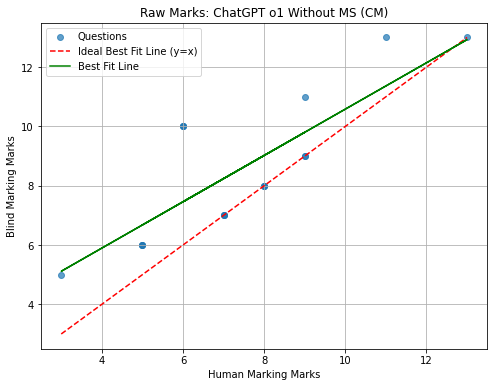

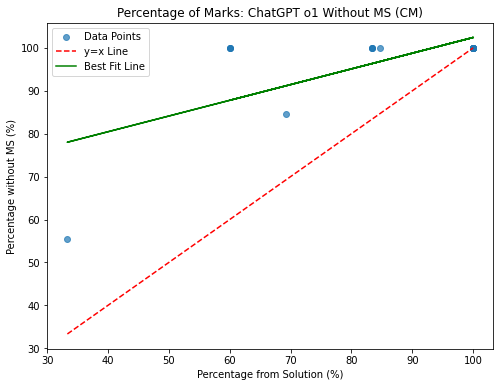

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,2,6,5,5,5,6,6,6,6,6,6,6,6
1,5,9,9,9,3,9,9,5,9,9,5,9,9
2,7,13,13,11,9,13,13,11,13,13,11,10,13
3,8,10,6,6,6,10,10,10,10,10,9,7,6
4,9,7,7,7,7,7,7,7,7,7,7,7,7


In [43]:
# List of relevant sheets to process
sheets = ['CM', 'EM', 'QM']

# Function to process each sheet and generate scatter plots
def process_sheet_noms(sheet_name):
    # Load the sheet
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()

    # Extract available marks
    available_marks = df['Available Marks'].values

    # Extract raw marks
    solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
    without_ms_marks = df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten()
    LLM_no_prompt = df[['Response without Prompt']].values.flatten()
    LLM_with_prompt = df[['Response with Prompt']].values.flatten()
    print(solution_marks)
    print(without_ms_marks)
    # Convert marks to percentages
    solution_perc = (df[['Solution 1', 'Solution 2', 'Solution 3']].div(available_marks, axis=0) * 100).values.flatten()
    without_ms_perc = (df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].div(available_marks, axis=0) * 100).values.flatten()

    # Compute line of best fit for raw marks
    slope_raw, intercept_raw = np.polyfit(solution_marks, without_ms_marks, 1)
    fit_line_raw = slope_raw * np.array(solution_marks) + intercept_raw
    
    # Compute line of best fit for percentage marks
    slope_perc, intercept_perc = np.polyfit(solution_perc, without_ms_perc, 1)
    fit_line_perc = slope_perc * np.array(solution_perc) + intercept_perc

    # Print gradient and y-intercept
    print(f"Sheet: {sheet_name}")
    print(f"Raw Marks - Gradient: {slope_raw:}, Y-Intercept: {intercept_raw}")
    print(f"Percentage Marks - Gradient: {slope_perc}, Y-Intercept: {intercept_perc}\n")

    # Plot for raw marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_marks, without_ms_marks, alpha=0.7, label="Questions")
    plt.plot([min(solution_marks), max(solution_marks)], [min(solution_marks), max(solution_marks)], 'r--', label="Ideal Best Fit Line (y=x)")
    plt.plot(solution_marks, fit_line_raw, 'g-', label="Best Fit Line")
    plt.xlabel("Human Marking Marks")
    plt.ylabel("Blind Marking Marks")
    plt.title(f"Raw Marks: ChatGPT o1 Without MS ({sheet_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for percentage marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_perc, without_ms_perc, alpha=0.7, label="Data Points")
    plt.plot([min(solution_perc), max(solution_perc)], [min(solution_perc), max(solution_perc)], 'r--', label="y=x Line")
    plt.plot(solution_perc, fit_line_perc, 'g-', label="Best Fit Line")
    plt.xlabel("Percentage from Solution (%)")
    plt.ylabel("Percentage without MS (%)")
    plt.title(f"Percentage of Marks: ChatGPT o1 Without MS ({sheet_name})")
    plt.legend()
    #plt.grid(True)
    plt.show()

    return df, slope_raw, intercept_raw, slope_perc, intercept_perc


df_cm, noms_cm_grad, noms_cm_int, noms_cm_percgrad, noms_cm_percint = process_sheet_noms(sheet_name="CM")
df_cm.head()



[ 4  4  4  9 11  9  2  1  2  2  3  3  6  7  8  3  2  4]
[ 5  5  5  9 11  9 11 11  4  4  4  4 15 15 14  7  7  7]
Sheet: EM
Raw Marks - Gradient: 0.6756756756756754, Y-Intercept: 5.013513513513515
Percentage Marks - Gradient: 0.1692186095873725, Y-Intercept: 79.57817600910192



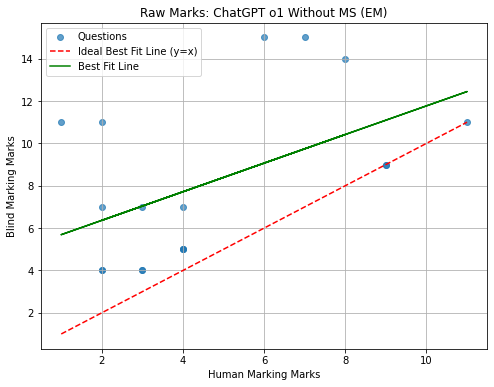

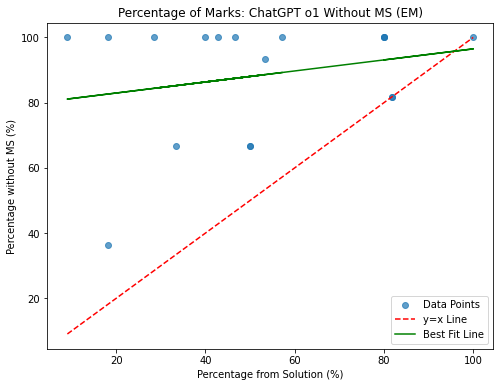

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,2,5,4,4,4,5,5,5,5,5,5,5,4
1,4,11,9,11,9,9,11,9,9,11,9,8,10
2,5,11,2,1,2,11,11,4,3,3,3,1,9
3,7,6,2,3,3,4,4,4,5,5,5,6,5
4,9,15,6,7,8,15,15,14,15,15,15,13,12


In [44]:
df_em, noms_em_grad, noms_em_int, noms_em_percgrad, noms_em_percint = process_sheet_noms(sheet_name="EM")
df_em.head()

[ 5  5  5  7  6  9  6  4  7 11 13 14 17 17 17 14  9 14]
[ 5  5  5  9  9  9  7  7  7 15 15 16 17 17 17 11 11 11]
Sheet: QM
Raw Marks - Gradient: 0.8695652173913043, Y-Intercept: 2.0265700483091793
Percentage Marks - Gradient: 0.2751155426573304, Y-Intercept: 69.58821024524643



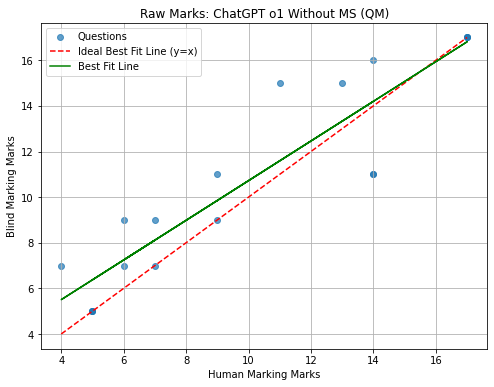

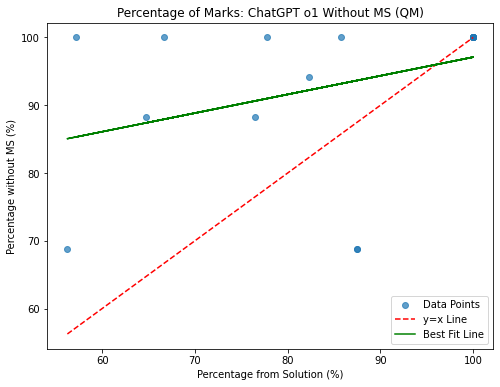

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,1,5,5,5,5,5,5,5,5,5,5,5,5
1,3,9,7,6,9,9,9,9,9,9,9,8,9
2,5,7,6,4,7,7,7,7,7,7,7,7,7
3,6,17,11,13,14,15,15,16,15,13,17,14,14
4,9,17,17,17,17,17,17,17,17,17,17,17,17


In [45]:
df_qm, noms_qm_grad, noms_qm_int, noms_qm_percgrad, noms_qm_percint= process_sheet_noms(sheet_name="QM")
df_qm.head()

Sheet: CM
Raw Marks - Gradient: 0.7951388888888888, Y-Intercept: 2.6134259259259247
Percentage Marks - Gradient: 0.4017864238573212, Y-Intercept: 62.25493442596714



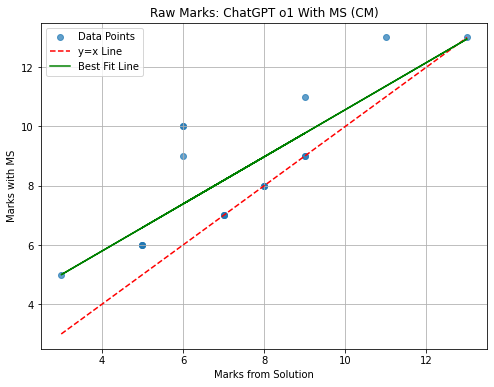

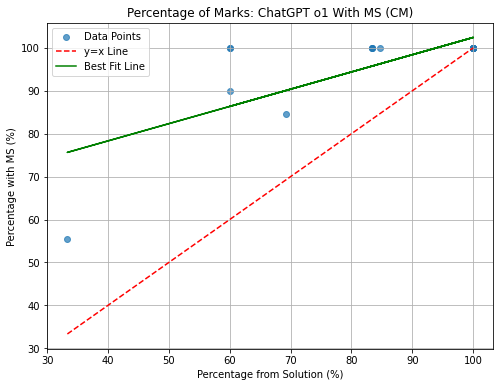

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,2,6,5,5,5,6,6,6,6,6,6,6,6
1,5,9,9,9,3,9,9,5,9,9,5,9,9
2,7,13,13,11,9,13,13,11,13,13,11,10,13
3,8,10,6,6,6,10,10,10,10,10,9,7,6
4,9,7,7,7,7,7,7,7,7,7,7,7,7


In [46]:
# Function to process each sheet and generate scatter plots with MS
def process_sheet_ms(sheet_name):
    # Load the sheet
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()

    # Extract available marks
    available_marks = df['Available Marks'].values

    # Extract raw marks
    solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
    with_ms_marks = df[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].values.flatten()

    # Convert marks to percentages
    solution_perc = (df[['Solution 1', 'Solution 2', 'Solution 3']].div(available_marks, axis=0) * 100).values.flatten()
    with_ms_perc = (df[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].div(available_marks, axis=0) * 100).values.flatten()

    # Compute line of best fit for raw marks
    slope_raw, intercept_raw = np.polyfit(solution_marks, with_ms_marks, 1)
    fit_line_raw = slope_raw * np.array(solution_marks) + intercept_raw
    
    # Compute line of best fit for percentage marks
    slope_perc, intercept_perc = np.polyfit(solution_perc, with_ms_perc, 1)
    fit_line_perc = slope_perc * np.array(solution_perc) + intercept_perc

    # Print gradient and y-intercept
    print(f"Sheet: {sheet_name}")
    print(f"Raw Marks - Gradient: {slope_raw:}, Y-Intercept: {intercept_raw}")
    print(f"Percentage Marks - Gradient: {slope_perc:}, Y-Intercept: {intercept_perc:}\n")

    # Plot for raw marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_marks, with_ms_marks, alpha=0.7, label="Data Points")
    plt.plot([min(solution_marks), max(solution_marks)], [min(solution_marks), max(solution_marks)], 'r--', label="y=x Line")
    plt.plot(solution_marks, fit_line_raw, 'g-', label="Best Fit Line")
    plt.xlabel("Marks from Solution")
    plt.ylabel("Marks with MS")
    plt.title(f"Raw Marks: ChatGPT o1 With MS ({sheet_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for percentage marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_perc, with_ms_perc, alpha=0.7, label="Data Points")
    plt.plot([min(solution_perc), max(solution_perc)], [min(solution_perc), max(solution_perc)], 'r--', label="y=x Line")
    plt.plot(solution_perc, fit_line_perc, 'g-', label="Best Fit Line")
    plt.xlabel("Percentage from Solution (%)")
    plt.ylabel("Percentage with MS (%)")
    plt.title(f"Percentage of Marks: ChatGPT o1 With MS ({sheet_name})")
    plt.legend()
    plt.grid(True)
    plt.show()
    return df, slope_raw, intercept_raw, slope_perc, intercept_perc


df_cm, ms_cm_grad, ms_cm_int, ms_cm_percgrad, ms_cm_percint = process_sheet_ms(sheet_name="CM")
df_cm.head()


Sheet: EM
Raw Marks - Gradient: 1.0180180180180178, Y-Intercept: 2.6936936936936933
Percentage Marks - Gradient: 0.6462466536865752, Y-Intercept: 48.93759863350964



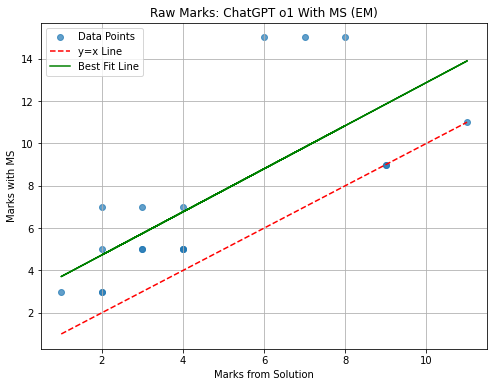

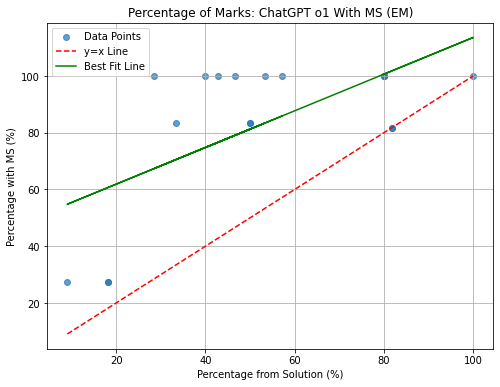

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,2,5,4,4,4,5,5,5,5,5,5,5,4
1,4,11,9,11,9,9,11,9,9,11,9,8,10
2,5,11,2,1,2,11,11,4,3,3,3,1,9
3,7,6,2,3,3,4,4,4,5,5,5,6,5
4,9,15,6,7,8,15,15,14,15,15,15,13,12


In [47]:
df_em, ms_em_grad, ms_em_int, ms_em_percgrad, ms_em_percint = process_sheet_ms(sheet_name="EM")
df_em.head()

Sheet: QM
Raw Marks - Gradient: 0.8016304347826088, Y-Intercept: 2.261473429951691
Percentage Marks - Gradient: 0.32270284817826517, Y-Intercept: 62.75399732403685



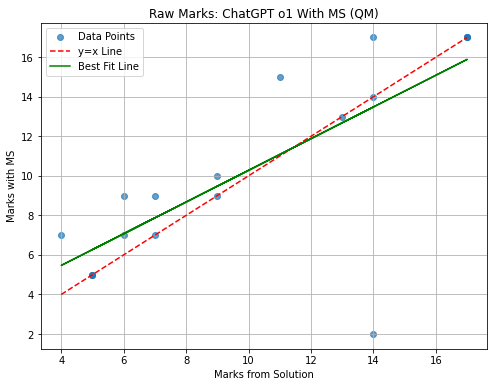

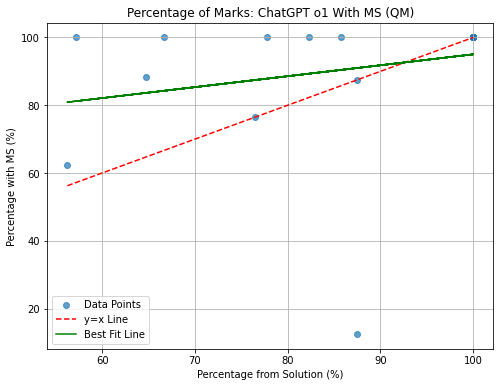

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response without Prompt,Response with Prompt
0,1,5,5,5,5,5,5,5,5,5,5,5,5
1,3,9,7,6,9,9,9,9,9,9,9,8,9
2,5,7,6,4,7,7,7,7,7,7,7,7,7
3,6,17,11,13,14,15,15,16,15,13,17,14,14
4,9,17,17,17,17,17,17,17,17,17,17,17,17


In [48]:
df_qm, ms_qm_grad, ms_qm_int, ms_qm_percgrad, ms_qm_percint = process_sheet_ms(sheet_name="QM")
df_qm.head()

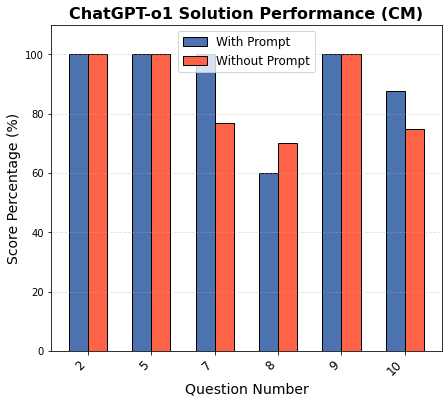

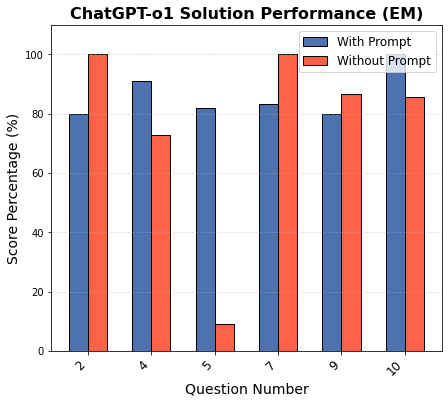

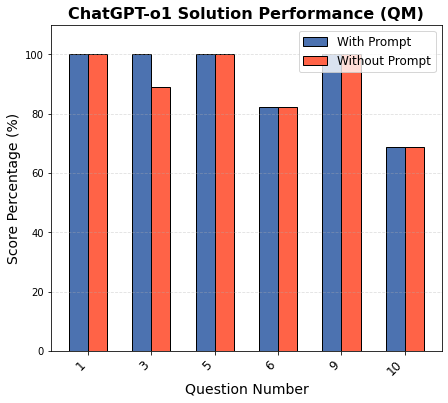

In [49]:
def plot_solution_performance(df, sheet_name):
    # Ensure necessary columns exist
    if {"Available Marks", "Response with Prompt", "Response without Prompt"}.issubset(df.columns):
        # Calculate percentages
        with_prompt_pct = (df["Response with Prompt"] / df["Available Marks"]) * 100
        without_prompt_pct = (df["Response without Prompt"] / df["Available Marks"]) * 100
        perfect_marks = df["Available Marks"]
        
        # Extract question numbers from the first column (assuming it's the first column)
        questions = df.iloc[:, 0]  # First column as question labels
        
        # Plot setup
        fig, ax = plt.subplots(figsize=(7, 6))  # Larger figure size
        width = 0.3  # Further reduced bar width
        x = range(len(questions))
        
        # Bar plots with refined color palette
        bars1 = ax.bar([i - width/2 for i in x], with_prompt_pct, width, label="With Prompt", color='#4C72B0', edgecolor='black')
        bars2 = ax.bar([i + width/2 for i in x], without_prompt_pct, width, label="Without Prompt", color='#FF6347', edgecolor='black')
    
        # Add subtitles (perfect marks) above each question
        # for i, mark in enumerate(perfect_marks):
        #     ax.text(i, max(with_prompt_pct[i], without_prompt_pct[i]) + 4, f"Perfect: {mark}", 
        #             ha='center', fontsize=10, color='black', weight='light')
    
        # Annotate the percentages inside the bars
        # for i, bar in enumerate(bars1):
        #     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
        #             f"{with_prompt_pct[i]:.1f}%", ha='center', fontsize=11, color='white', weight='bold')
    
        # for i, bar in enumerate(bars2):
        #     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
        #             f"{without_prompt_pct[i]:.1f}%", ha='center', fontsize=11, color='white', weight='bold')
    
        # Formatting
        ax.set_xticks(x)
        ax.set_xticklabels(questions, rotation=45, ha='right', fontsize=12)  # Rotate labels and ensure no overlap
        ax.set_xlabel("Question Number", fontsize=14)
        ax.set_ylabel("Score Percentage (%)", fontsize=14)
        ax.set_title(f"ChatGPT-o1 Solution Performance ({sheet_name})", fontsize=16, weight='bold')
        ax.legend(fontsize=12)
        ax.set_ylim(0, 110)  # To ensure visibility
        ax.grid(axis="y", linestyle="--", alpha=0.4)  # Light gridlines for a cleaner look
    

dfs = [df_cm, df_em, df_qm]
# Read and plot each sheet separately
for sheet in sheets:
    df = dfs[sheets.index(sheet)]
    plot_solution_performance(df, sheet)

In [50]:
def calculate_mse(dfs, gradients, intercepts):
    mse_with_ms = []
    mse_without_ms = []
    residuals_with_ms = []
    residuals_without_ms = []

    for df, grad, intercept in zip(dfs, gradients, intercepts):
        # Extract raw marks
        solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()

        # Generate predicted marks using gradients and intercepts
        predicted_without_ms = grad[0] * solution_marks + intercept[0]
        predicted_with_ms = grad[1] * solution_marks + intercept[1]

        # Calculate MSE
        mse_without = mean_squared_error(solution_marks, predicted_without_ms)
        mse_with = mean_squared_error(solution_marks, predicted_with_ms)

        mse_without_ms.append(mse_without)
        mse_with_ms.append(mse_with)
        residuals_without_ms.append(solution_marks - predicted_without_ms)
        residuals_with_ms.append(solution_marks - predicted_with_ms)

    return np.array(mse_without_ms), np.array(mse_with_ms), residuals_without_ms, residuals_with_ms

# Gradients and intercepts for each sheet
gradients = [
    (noms_cm_grad, ms_cm_grad),
    (noms_em_grad, ms_em_grad),
    (noms_qm_grad, ms_qm_grad)
]

intercepts = [
    (noms_cm_int, ms_cm_int),
    (noms_em_int, ms_em_int),
    (noms_qm_int, ms_qm_int)
]

# Calculate MSE for CM, EM, QM using gradients and intercepts
mse_without_ms, mse_with_ms, residuals_without_ms, residuals_with_ms = calculate_mse(dfs, gradients, intercepts)
print("CM, EM, QM")
print("MSE without MS:", mse_without_ms)
print("MSE with MS:", mse_with_ms)
#print("Residuals without MS:", residuals_without_ms)
#print("Residuals with MS:", residuals_with_ms)

CM, EM, QM
MSE without MS: [ 1.61631944 13.11486486  0.86943103]
MSE with MS: [1.45839763 7.71871872 0.88165929]


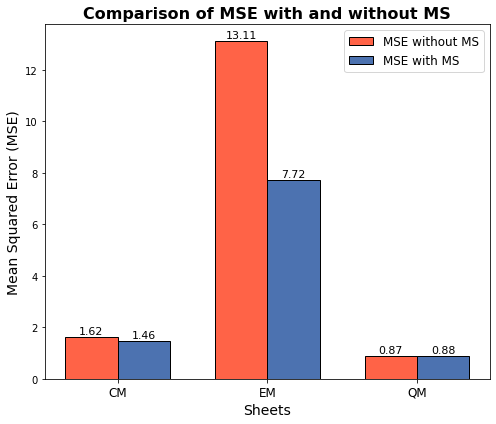

In [51]:
def plot_mse_comparison(mse_without_ms, mse_with_ms, sheets):
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Define the bar width
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    index = np.arange(len(sheets))
    
    # Plot the bars
    bars1 = ax.bar(index, mse_without_ms, bar_width, label='MSE without MS', color='#FF6347', edgecolor='black')
    bars2 = ax.bar(index + bar_width, mse_with_ms, bar_width, label='MSE with MS', color='#4C72B0', edgecolor='black')
    
    # Add labels, title, and legend
    ax.set_xlabel('Sheets', fontsize=14)
    ax.set_ylabel('Mean Squared Error (MSE)', fontsize=14)
    ax.set_title('Comparison of MSE with and without MS', fontsize=16, weight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(sheets, fontsize=12)
    ax.legend(fontsize=12)
    
    # Annotate the bars with MSE values
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the MSE comparison
plot_mse_comparison(mse_without_ms, mse_with_ms, sheets)

In [52]:
def calculate_devs(df, gradients, intercepts):
    square_devs = []

    for grad, intercept in zip(gradients, intercepts):
        # Extract raw marks
        solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
        available_marks = df['Available Marks'].values
        # Generate predicted marks using gradients and intercepts
        predicted_marks = grad * solution_marks + intercept

        # Calculate deviation squared for each question
        question_square_dev = (solution_marks - predicted_marks) ** 2


        # Calculate average deviation squared for each question
        avg_question_dev = np.mean(question_square_dev.reshape(-1, 3), axis=1)
        # Calculate the root mean square deviation
        avg_question_dev = np.sqrt(avg_question_dev)
        print(avg_question_dev)
        avg_question_dev = avg_question_dev / available_marks
        # Normalize the deviations
        #avg_question_dev = avg_question_dev / available_marks
        square_devs.append(avg_question_dev)
    
    # 
    return np.array(square_devs)

# Calculate accuracy for each sheet
devs_cm = calculate_devs(df_cm, [noms_cm_grad, ms_cm_grad], [noms_cm_int, ms_cm_int])
devs_em = calculate_devs(df_em, [noms_em_grad, ms_em_grad], [noms_em_int, ms_em_int])
devs_qm = calculate_devs(df_qm, [noms_qm_grad, ms_qm_grad], [noms_qm_int, ms_qm_int])

# Print the accuracies
print("Deviations for CM:", devs_cm)
print("Deviations for EM:", devs_em)
print("Deviations for QM:", devs_qm)

[1.67708333 1.38541667 0.51041667 1.45833333 1.23958333 1.02083333]
[1.58912037 1.31404893 0.49140771 1.38425926 1.17939815 0.97453704]
[3.71621622 1.90310384 4.4755851  4.15146484 2.75599486 4.04920882]
[2.76576577 2.86791818 2.72373697 2.7417549  2.8198582  2.74778713]
[1.37439614 1.08234394 1.29767707 0.40821256 0.19082126 0.51878413]
[1.2696256  0.84384765 1.16397739 0.35258643 1.11080918 0.5028619 ]
Deviations for CM: [[0.27951389 0.15393519 0.03926282 0.14583333 0.17708333 0.12760417]
 [0.2648534  0.14600544 0.03780059 0.13842593 0.16848545 0.12181713]]
Deviations for EM: [[0.74324324 0.17300944 0.40687137 0.69191081 0.18373299 0.5784584 ]
 [0.55315315 0.26071983 0.24761245 0.45695915 0.18799055 0.39254102]]
Deviations for QM: [[0.27487923 0.12026044 0.18538244 0.0240125  0.01122478 0.03242401]
 [0.25392512 0.09376085 0.16628248 0.02074038 0.06534172 0.03142887]]


In [53]:
# Define the weights as the available marks for each question
weights_cm = df_cm['Available Marks'].values
weights_em = df_em['Available Marks'].values
weights_qm = df_qm['Available Marks'].values

# Calculate the weighted mean MSE for each category
mean_mse_cm_with = np.average(devs_cm[1], weights=weights_cm)
mean_mse_cm_without = np.average(devs_cm[0], weights=weights_cm)

mean_mse_em_with = np.average(devs_em[1], weights=weights_em)
mean_mse_em_without = np.average(devs_em[0], weights=weights_em)

mean_mse_qm_with = np.average(devs_qm[1], weights=weights_qm)
mean_mse_qm_without = np.average(devs_qm[0], weights=weights_qm)

# Print the results
print("Mean MSE for CM (without MS):", mean_mse_cm_without)
print("Mean MSE for CM (with MS):", mean_mse_cm_with)
print("Mean MSE for EM (without MS):", mean_mse_em_without)
print("Mean MSE for EM (with MS):", mean_mse_em_with)
print("Mean MSE for QM (without MS):", mean_mse_qm_without)
print("Mean MSE for QM (with MS):", mean_mse_qm_with)


Mean MSE for CM (without MS): 0.13757861635220114
Mean MSE for CM (with MS): 0.1308070085370161
Mean MSE for EM (without MS): 0.38275588496146906
Mean MSE for EM (with MS): 0.3030331116128152
Mean MSE for QM (without MS): 0.06862302950282557
Mean MSE for QM (with MS): 0.07385504442843357


In [54]:
def calculate_mse(dfs, gradients, intercepts):
    mse_with_ms = []
    mse_without_ms = []
    residuals_with_ms = []
    residuals_without_ms = []

    for df, grad, intercept in zip(dfs, gradients, intercepts):
        # Extract raw marks
        solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()

        # Generate predicted marks using gradients and intercepts
        predicted_without_ms = grad[0] * solution_marks + intercept[0]
        predicted_with_ms = grad[1] * solution_marks + intercept[1]

        # Calculate MSE
        mse_without = mean_squared_error(solution_marks, predicted_without_ms)
        mse_with = mean_squared_error(solution_marks, predicted_with_ms)

        mse_without_ms.append(mse_without)
        mse_with_ms.append(mse_with)
        residuals_without_ms.append(solution_marks - predicted_without_ms)
        residuals_with_ms.append(solution_marks - predicted_with_ms)

    return np.array(mse_without_ms), np.array(mse_with_ms), residuals_without_ms, residuals_with_ms

# Gradients and intercepts for each sheet
gradients = [
    (noms_cm_grad, ms_cm_grad),
    (noms_em_grad, ms_em_grad),
    (noms_qm_grad, ms_qm_grad)
]

intercepts = [
    (noms_cm_int, ms_cm_int),
    (noms_em_int, ms_em_int),
    (noms_qm_int, ms_qm_int)
]

# Calculate MSE for CM, EM, QM using gradients and intercepts
mse_without_ms, mse_with_ms, residuals_without_ms, residuals_with_ms = calculate_mse(dfs, gradients, intercepts)

mse_without_ms = np.array([mean_mse_cm_without, mean_mse_em_without, mean_mse_qm_without])
mse_with_ms = np.array([mean_mse_cm_with, mean_mse_em_with, mean_mse_qm_with])
print("CM, EM, QM")
print("MSE without MS:", mse_without_ms)
print("MSE with MS:", mse_with_ms)
#print("Residuals without MS:", residuals_without_ms)
#print("Residuals with MS:", residuals_with_ms)

CM, EM, QM
MSE without MS: [0.13757862 0.38275588 0.06862303]
MSE with MS: [0.13080701 0.30303311 0.07385504]


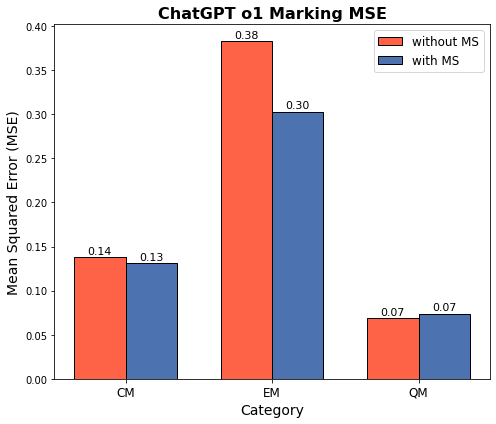

In [55]:
def plot_mse_comparison(mse_without_ms, mse_with_ms, sheets):
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Define the bar width
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    index = np.arange(len(sheets))
    
    # Plot the bars
    bars1 = ax.bar(index, mse_without_ms, bar_width, label='without MS', color='#FF6347', edgecolor='black')
    bars2 = ax.bar(index + bar_width, mse_with_ms, bar_width, label='with MS', color='#4C72B0', edgecolor='black')
    
    # Add labels, title, and legend
    ax.set_xlabel('Category', fontsize=14)
    ax.set_ylabel('Mean Squared Error (MSE)', fontsize=14)
    ax.set_title('ChatGPT o1 Marking MSE', fontsize=16, weight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(sheets, fontsize=12)
    ax.legend(fontsize=12)
    
    # Annotate the bars with MSE values
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the MSE comparison
plot_mse_comparison(mse_without_ms, mse_with_ms, sheets)

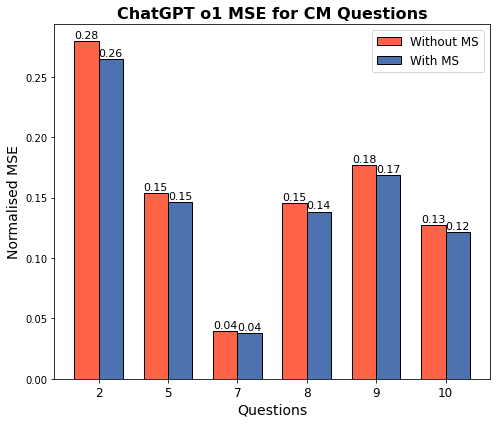

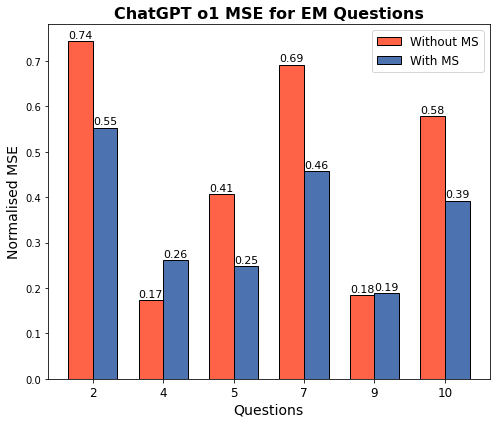

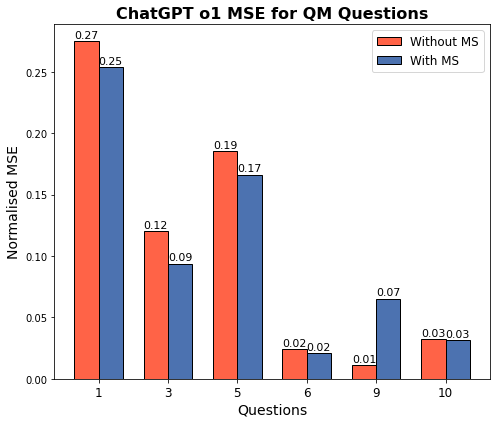

In [56]:
def plot_deviations(deviations, sheet_name, df):
    # Define the number of questions
    num_questions = deviations.shape[1]
    
    # Define the x-axis labels
    x_labels = df.iloc[:, 0].values
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Define the bar width
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    index = np.arange(num_questions)
    
    # Plot the bars
    bars1 = ax.bar(index, deviations[0], bar_width, label='Without MS', color='#FF6347', edgecolor='black')
    bars2 = ax.bar(index + bar_width, deviations[1], bar_width, label='With MS', color='#4C72B0', edgecolor='black')
    
    # Add labels, title, and legend
    ax.set_xlabel('Questions', fontsize=14)
    ax.set_ylabel('Normalised MSE', fontsize=14)
    ax.set_title(f'ChatGPT o1 MSE for {sheet_name} Questions', fontsize=16, weight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.legend(fontsize=12)
    
    # Annotate the bars with deviation values
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot deviations for CM, EM, and QM questions
plot_deviations(devs_cm, 'CM', df_cm)
plot_deviations(devs_em, 'EM', df_em)
plot_deviations(devs_qm, 'QM', df_qm)

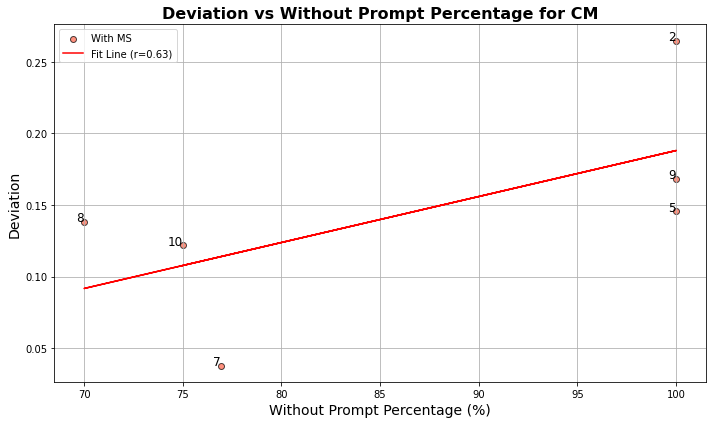

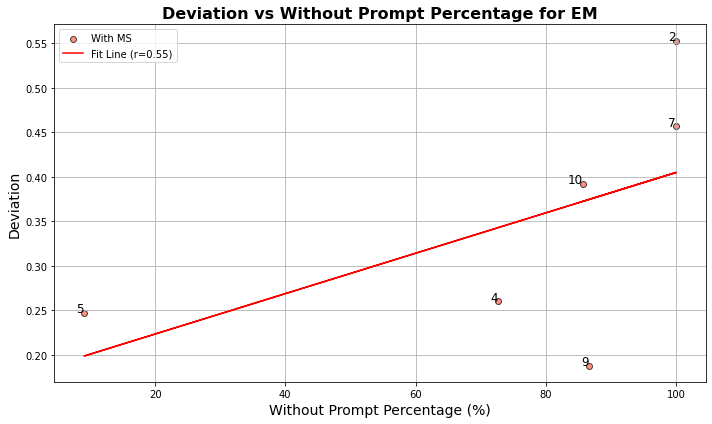

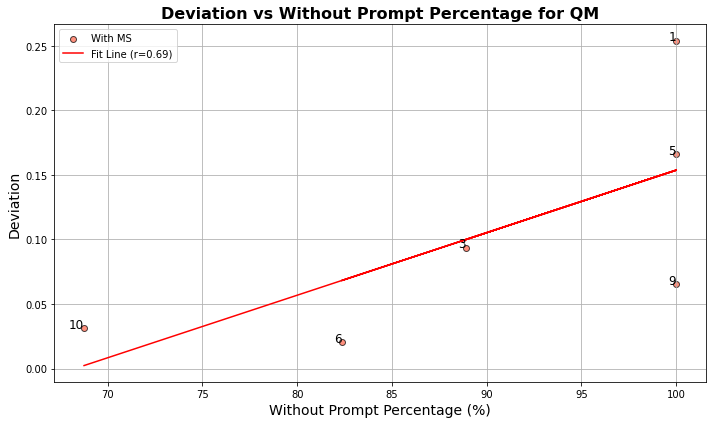

In [57]:
def plot_deviation_vs_with_prompt_pct(dfs, deviations, sheets):
    for df, dev, sheet in zip(dfs, deviations, sheets):
        # Calculate with_prompt_pct
        with_prompt_pct = (df["Response without Prompt"] / df["Available Marks"]) * 100
        
        # Extract question numbers
        questions = df["Question Number"]
        
        # Set up the figure and axis
        plt.figure(figsize=(10, 6))
        
        # Perform linear regression
        slope, intercept = np.polyfit(with_prompt_pct, dev[1], 1)
        fit_line = slope * np.array(with_prompt_pct) + intercept
        
        # Calculate r value
        correlation_matrix = np.corrcoef(with_prompt_pct, dev[1])
        r_value = correlation_matrix[0, 1]
        
    
        
        # Plot the deviations against with_prompt_pct
        plt.scatter(with_prompt_pct, dev[1], color='#FF6347', edgecolor='black', alpha=0.7, label='With MS')
        plt.plot(with_prompt_pct, fit_line, color='red', label=f'Fit Line (r={r_value:.2f})')
        plt.legend()
        
    
        
        # Add labels, title, and grid
        plt.xlabel('Without Prompt Percentage (%)', fontsize=14)
        plt.ylabel('Deviation', fontsize=14)
        plt.title(f'Deviation vs Without Prompt Percentage for {sheet}', fontsize=16, weight='bold')
        plt.grid(True)
        
        # Annotate each point with the question number
        for i, txt in enumerate(questions):
            plt.annotate(txt, (with_prompt_pct[i], dev[1][i]), fontsize=12, ha='right')
        
        # Show the plot
        plt.tight_layout()
        plt.show()

# Call the function to plot the deviation vs with_prompt_pct for CM, EM, and QM
deviations = [devs_cm, devs_em, devs_qm]
plot_deviation_vs_with_prompt_pct(dfs, deviations, sheets)

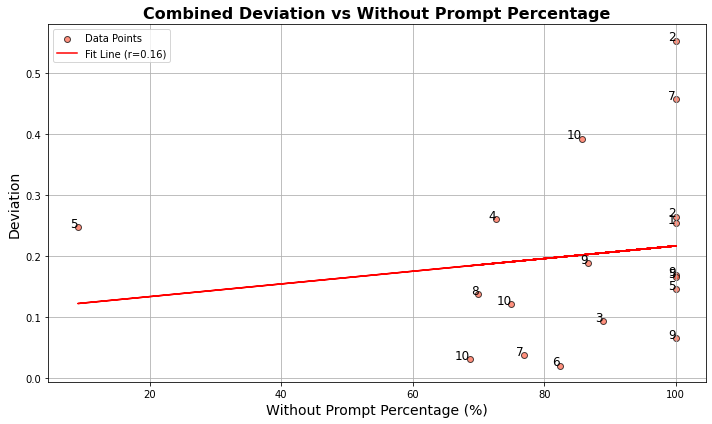

In [58]:
def plot_combined_deviation_vs_performance(deviations, dfs, sheets):
    combined_devs = []
    combined_performance = []
    combined_questions = []

    for dev, df, sheet in zip(deviations, dfs, sheets):
        # Calculate with_prompt_pct
        with_prompt_pct = (df["Response without Prompt"] / df["Available Marks"]) * 100
        
        # Append deviations and performance
        combined_devs.extend(dev[1])
        combined_performance.extend(with_prompt_pct)
        combined_questions.extend(df["Question Number"])

    # Convert to numpy arrays for plotting
    combined_devs = np.array(combined_devs)
    combined_performance = np.array(combined_performance)

    # Perform linear regression
    slope, intercept = np.polyfit(combined_performance, combined_devs, 1)
    fit_line = slope * combined_performance + intercept

    # Calculate r value
    correlation_matrix = np.corrcoef(combined_performance, combined_devs)
    r_value = correlation_matrix[0, 1]

    # Plot the combined deviations against performance
    plt.figure(figsize=(10, 6))
    plt.scatter(combined_performance, combined_devs, color='#FF6347', edgecolor='black', alpha=0.7, label='Data Points')
    plt.plot(combined_performance, fit_line, color='red', label=f'Fit Line (r={r_value:.2f})')
    plt.legend()

    # Add labels, title, and grid
    plt.xlabel('Without Prompt Percentage (%)', fontsize=14)
    plt.ylabel('Deviation', fontsize=14)
    plt.title('Combined Deviation vs Without Prompt Percentage', fontsize=16, weight='bold')
    plt.grid(True)

    # Annotate each point with the question number
    for i, txt in enumerate(combined_questions):
        plt.annotate(txt, (combined_performance[i], combined_devs[i]), fontsize=12, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the combined deviation vs performance
plot_combined_deviation_vs_performance(deviations, dfs, sheets)

In [59]:
def calculate_weighted_average_performance(df):
    # Calculate the performance percentage for each question
    performancewith_pct = (df["Response with Prompt"] / df["Available Marks"]) * 100
    performancewithout_pct = (df["Response without Prompt"]/ df["Available Marks"])*100
    # Calculate the total available marks
    total_available_marks = df["Available Marks"].sum()
    
    # Calculate the weighted average performance percentage
    with_performance = (performancewith_pct * df["Available Marks"]).sum() / total_available_marks
    without_performance = (performancewithout_pct * df["Available Marks"]).sum() / total_available_marks
    return with_performance, without_performance

# Example usage for each sheet
performance_cm_with, performance_cm_without = calculate_weighted_average_performance(df_cm)
performance_em_with, performance_em_without = calculate_weighted_average_performance(df_em)
performance_qm_with, performance_qm_without = calculate_weighted_average_performance(df_qm)
print("Weighted Average Performance for CM:", performance_cm_without, performance_cm_with)
print("Weighted Average Performance for EM:", performance_em_without, performance_em_with)
print("Weighted Average Performance for QM:", performance_qm_without, performance_qm_with)

Weighted Average Performance for CM: 84.90566037735849 90.56603773584905
Weighted Average Performance for EM: 70.9090909090909 85.45454545454545
Weighted Average Performance for QM: 87.32394366197182 88.73239436619718


Correlation coefficient (r): -0.82


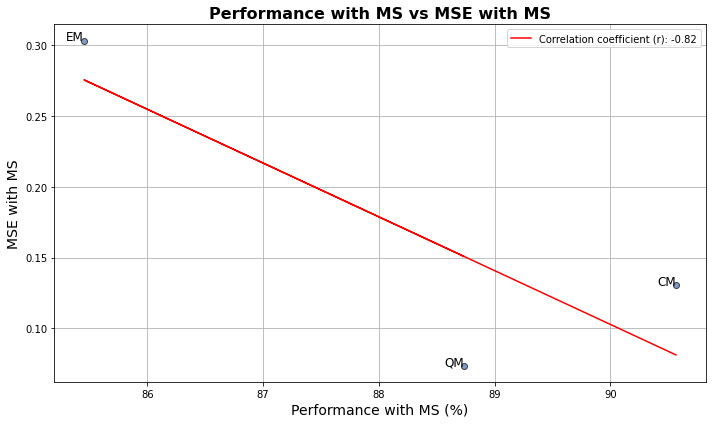

In [60]:
# Define the performance with MS for each sheet
performance_with_ms = [performance_cm_with, performance_em_with, performance_qm_with]

# Plot the performance with MS against the MSE with MS
plt.figure(figsize=(10, 6))
plt.scatter(performance_with_ms, mse_with_ms, color='#4C72B0', edgecolor='black', alpha=0.7)

# Perform linear regression and calculate r value
slope, intercept = np.polyfit(performance_with_ms, mse_with_ms, 1)
fit_line = slope * np.array(performance_with_ms) + intercept
correlation_matrix = np.corrcoef(performance_with_ms, mse_with_ms)
r_value = correlation_matrix[0, 1]
print(f"Correlation coefficient (r): {r_value:.2f}")

# Plot the fit line
plt.plot(performance_with_ms, fit_line, color='red', label=f"Correlation coefficient (r): {r_value:.2f}")

# Add labels, title, and grid
plt.xlabel('Performance with MS (%)', fontsize=14)
plt.ylabel('MSE with MS', fontsize=14)
plt.title('Performance with MS vs MSE with MS', fontsize=16, weight='bold')
plt.legend()
plt.grid(True)

# Annotate each point with the sheet name
for i, sheet in enumerate(sheets):
    plt.annotate(sheet, (performance_with_ms[i], mse_with_ms[i]), fontsize=12, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Correlation coefficient (r): -1.00


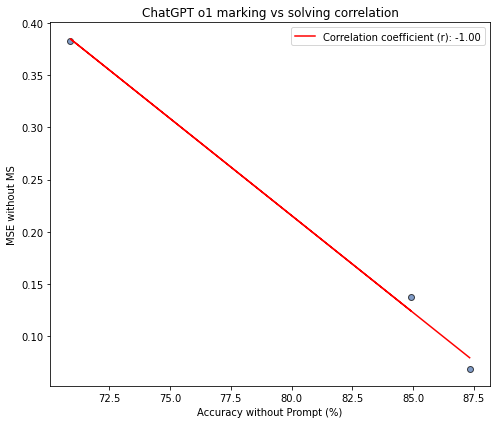

In [61]:
# Define the performance with MS for each sheet
performance_without_ms = [performance_cm_without, performance_em_without, performance_qm_without]

# Plot the performance with MS against the MSE with MS
plt.figure(figsize=(7, 6))
plt.scatter(performance_without_ms, mse_without_ms, color='#4C72B0', edgecolor='black', alpha=0.7)

# Perform linear regression and calculate r value
slope, intercept = np.polyfit(performance_without_ms, mse_without_ms, 1)
fit_line = slope * np.array(performance_without_ms) + intercept
correlation_matrix = np.corrcoef(performance_without_ms, mse_without_ms)
r_value = correlation_matrix[0, 1]
print(f"Correlation coefficient (r): {r_value:.2f}")

# Plot the fit line
plt.plot(performance_without_ms, fit_line, color='red', label=f"Correlation coefficient (r): {r_value:.2f}")

# Add labels, title, and grid
plt.xlabel('Accuracy without Prompt (%)')
plt.ylabel('MSE without MS')
plt.title('ChatGPT o1 marking vs solving correlation')
plt.legend()
#plt.grid(True)



# Show the plot
plt.tight_layout()
plt.show()

[5 6 5 9 8 9 8 9 6 7 8 7 7 7 7 8 8 8]
[ 2.5  5.   4.5  5.   9.   8.   9.  13.   9.   6.  10.   6.   2.5  5.
  4.5  5.   8.   4. ]


<ipython-input-62-d3c198a4dead>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min(solution_marks), max(solution_marks)], [min(solution_marks), max(solution_marks)], 'r--', label="Ideal Line", color='green')
<ipython-input-62-d3c198a4dead>:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(solution_marks, fit_line_rawms, 'g-', label="with MS", color='orange')
<ipython-input-62-d3c198a4dead>:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(solution_marks, fit_line_rawnoms, 'b-', label="without MS", color='blue')


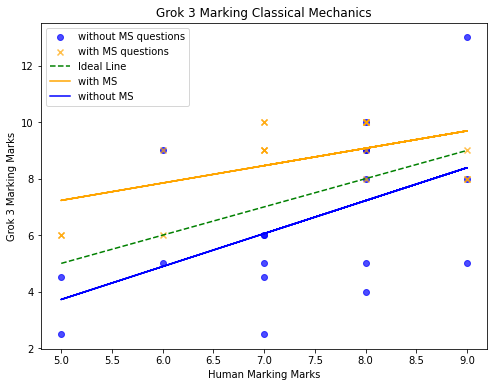

In [62]:
# List of relevant sheets to process
sheets = ['CM', 'EM', 'QM']

# Function to process each sheet and generate scatter plots
def process_sheet_noms(sheet_name):
    # Load the sheet
    file_path = "Grok3_marking3.xlsx"
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()

    # Extract available marks
    available_marks = df['Available Marks'].values

    # Extract raw marks
    solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
    without_ms_marks = df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten()
    LLM_no_prompt = df[['Response without Prompt']].values.flatten()
    LLM_with_prompt = df[['Response with Prompt']].values.flatten()
    print(solution_marks)
    print(without_ms_marks)
    # Convert marks to percentages
    solution_perc = (df[['Solution 1', 'Solution 2', 'Solution 3']].div(available_marks, axis=0) * 100).values.flatten()
    without_ms_perc = (df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].div(available_marks, axis=0) * 100).values.flatten()
    # Extract available marks
    available_marks = df['Available Marks'].values

    # Extract raw marks
    solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
    with_ms_marks = df[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].values.flatten()

    # Convert marks to percentages
    #solution_perc = (df[['Solution 1', 'Solution 2', 'Solution 3']].div(available_marks, axis=0) * 100).values.flatten()
    #with_ms_perc = (df[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].div(available_marks, axis=0) * 100).values.flatten()

    # Compute line of best fit for raw marks
    slope_rawms, intercept_rawms = np.polyfit(solution_marks, with_ms_marks, 1)
    fit_line_rawms = slope_rawms * np.array(solution_marks) + intercept_rawms
    # Compute line of best fit for raw marks
    slope_rawnoms, intercept_rawnoms = np.polyfit(solution_marks, without_ms_marks, 1)
    fit_line_rawnoms = slope_rawnoms * np.array(solution_marks) + intercept_rawnoms
    
    # Print gradient and y-intercept
    #print(f"Sheet: {sheet_name}")
    #print(f"Raw Marks - Gradient: {slope_raw:}, Y-Intercept: {intercept_raw}")
    #print(f"Percentage Marks - Gradient: {slope_perc}, Y-Intercept: {intercept_perc}\n")

    # Plot for raw marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_marks, without_ms_marks, alpha=0.7, label="without MS questions", color='blue')
    plt.scatter(solution_marks, with_ms_marks, alpha=0.7, label="with MS questions", color='orange', marker='x')
    plt.plot([min(solution_marks), max(solution_marks)], [min(solution_marks), max(solution_marks)], 'r--', label="Ideal Line", color='green')
    plt.plot(solution_marks, fit_line_rawms, 'g-', label="with MS", color='orange')
    plt.plot(solution_marks, fit_line_rawnoms, 'b-', label="without MS", color='blue')
    plt.xlabel("Human Marking Marks")
    plt.ylabel("Grok 3 Marking Marks")
    plt.title(f"Grok 3 Marking Classical Mechanics")
    plt.legend()
    #plt.grid(True)
    plt.show()

    #return df, slope_raw, intercept_raw, slope_perc, intercept_perc


process_sheet_noms(sheet_name="CM")



With MS - Gradient: 0.758064516129032 Y-Intercept: 3.1630824372759823
Without MS - Gradient: 0.7115975422427032 Y-Intercept: 3.9112476531831346


<ipython-input-63-45ed0b8b5e9f>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min(combined_solution_marks), max(combined_solution_marks)], [min(combined_solution_marks), max(combined_solution_marks)], 'r--', label="Ideal Line", color='green')
<ipython-input-63-45ed0b8b5e9f>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(combined_solution_marks, fit_line_combined_rawms, 'g-', label="with MS", color='orange')
<ipython-input-63-45ed0b8b5e9f>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(combined_solution_marks, fit_line_combined_rawnoms, 'b-', label="without MS", color='blue')


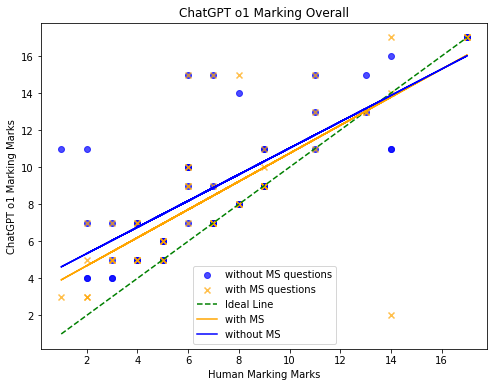

In [63]:
# List of relevant sheets to process
sheets = ['CM', 'EM', 'QM']

# Function to process each sheet and generate scatter plots
def process_sheet_all(sheet_name):
    # Load the sheet
    file_path = "o1 Grading1.xlsx"
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()
    # Combine data from all sheets
    combined_solution_marks = np.concatenate([df_cm[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten(),
                                              df_em[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten(),
                                              df_qm[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()])
    
    combined_without_ms_marks = np.concatenate([df_cm[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten(),
                                                df_em[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten(),
                                                df_qm[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten()])
    
    combined_with_ms_marks = np.concatenate([df_cm[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].values.flatten(),
                                             df_em[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].values.flatten(),
                                             df_qm[['with MS - Sol 1', 'with MS - Sol 2', 'with MS - Sol 3']].values.flatten()])
    
    # Compute line of best fit for combined raw marks
    slope_combined_rawms, intercept_combined_rawms = np.polyfit(combined_solution_marks, combined_with_ms_marks, 1)
    fit_line_combined_rawms = slope_combined_rawms * np.array(combined_solution_marks) + intercept_combined_rawms
    
    slope_combined_rawnoms, intercept_combined_rawnoms = np.polyfit(combined_solution_marks, combined_without_ms_marks, 1)
    fit_line_combined_rawnoms = slope_combined_rawnoms * np.array(combined_solution_marks) + intercept_combined_rawnoms
    
    print("With MS - Gradient:", slope_combined_rawms, "Y-Intercept:", intercept_combined_rawms)
    print("Without MS - Gradient:", slope_combined_rawnoms, "Y-Intercept:", intercept_combined_rawnoms)
    
    # Plot for combined raw marks
    plt.figure(figsize=(8, 6))
    plt.scatter(combined_solution_marks, combined_without_ms_marks, alpha=0.7, label="without MS questions", color='blue')
    plt.scatter(combined_solution_marks, combined_with_ms_marks, alpha=0.7, label="with MS questions", color='orange', marker='x')
    plt.plot([min(combined_solution_marks), max(combined_solution_marks)], [min(combined_solution_marks), max(combined_solution_marks)], 'r--', label="Ideal Line", color='green')
    plt.plot(combined_solution_marks, fit_line_combined_rawms, 'g-', label="with MS", color='orange')
    plt.plot(combined_solution_marks, fit_line_combined_rawnoms, 'b-', label="without MS", color='blue')
    plt.xlabel("Human Marking Marks")
    plt.ylabel("ChatGPT o1 Marking Marks")
    plt.title(f"ChatGPT o1 Marking Overall")
    plt.legend()
    plt.show()

    #return df, slope_raw, intercept_raw, slope_perc, intercept_perc


process_sheet_all(sheet_name="QM")



In [64]:

# Find the Excel file in the current directory
files = [f for f in os.listdir() if f.endswith(".xlsx")]
if not files:
    raise FileNotFoundError("No Excel file found in the current directory.")
file_path = "data analysis summary1.xlsx"  # Assuming there's only one Excel file

# Load the Excel file and the 'CM' sheet
xls = pd.ExcelFile(file_path)
print(f"Loaded Excel file: {file_path}")
LLMdf = pd.read_excel(xls, sheet_name='Sheet1')
# Clean column names by stripping whitespace
LLMdf.columns = LLMdf.columns.str.strip()
LLMdf.head()

Loaded Excel file: data analysis summary1.xlsx


,Model,slope_raw_cm_Without,intercept_raw_cm_Without,slope_perc_cm_Without,intercept_perc_cm_Without,slope_raw_em_Without,intercept_raw_em_Without,slope_perc_em_Without,intercept_perc_em_Without,slope_raw_qm_Without,...,mse_cm_Without,mse_cm_With,mse_em_Without,mse_em_With,mse_qm_Without,mse_qm_With,slope_raw_Without,intercept_raw_Without,slope_raw_With,intercept_raw_With
0,GPT-o1,0.781250,2.770833,0.366161,65.813308,0.675676,5.013514,0.169219,79.578176,0.869565,...,0.137579,0.130807,0.382756,0.303033,0.068623,0.073855,0.711598,3.911248,0.758065,3.163082
1,GPT-4o,0.753472,3.085648,0.251734,76.469440,0.887387,4.247748,0.372273,72.419211,0.997283,...,0.151142,0.154537,0.406148,0.427498,0.140845,0.094058,0.838710,3.405018,0.764977,3.834613
2,GPT-4,0.861111,-0.092593,0.474689,29.981937,0.279279,4.668919,-0.104861,71.381894,0.675272,...,0.127408,0.025838,0.249236,0.376816,0.145348,0.071741,0.561252,2.736004,0.624040,3.886670
3,Gemini 1.5 Pro,0.631944,3.921296,-0.024144,98.638102,0.578829,5.743243,0.073144,88.555012,0.875000,...,0.159073,0.184042,0.413738,0.412423,0.045078,0.168368,0.620968,4.418459,0.447005,5.277522
4,Grok 3,1.166667,-2.111111,-0.089050,79.171306,0.394724,4.230349,-0.164609,86.899945,0.924550,...,0.101311,0.153431,0.230881,0.296396,0.092803,0.093949,0.734846,1.572337,0.827067,3.034952


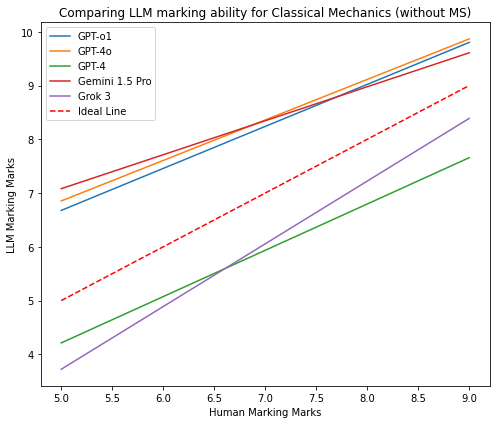

In [65]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_cm_Without'] * x_values + row['intercept_raw_cm_Without']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Classical Mechanics (without MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

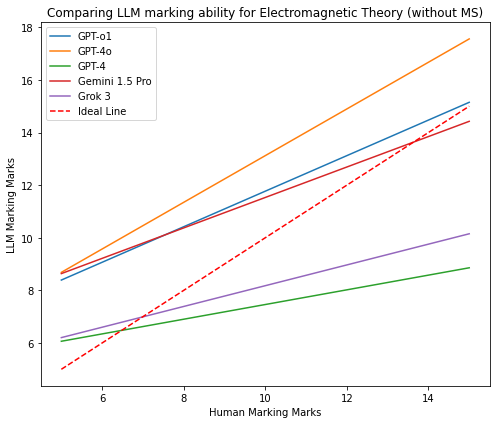

In [66]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_em_Without'] * x_values + row['intercept_raw_em_Without']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Electromagnetic Theory (without MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

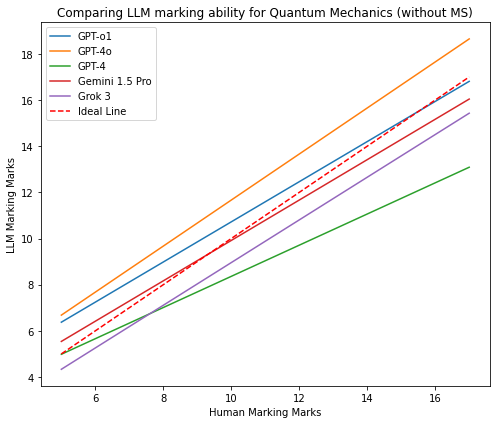

In [67]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_qm_Without'] * x_values + row['intercept_raw_qm_Without']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Quantum Mechanics (without MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

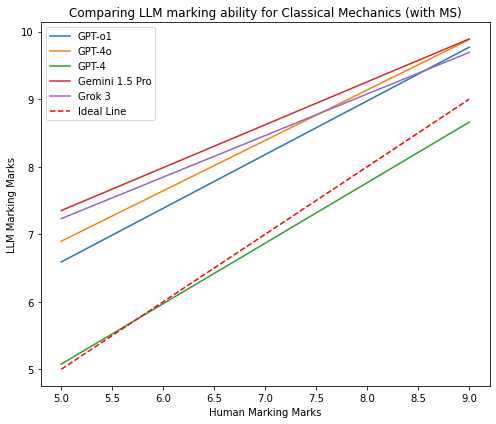

In [68]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_cm_With'] * x_values + row['intercept_raw_cm_With']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Classical Mechanics (with MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

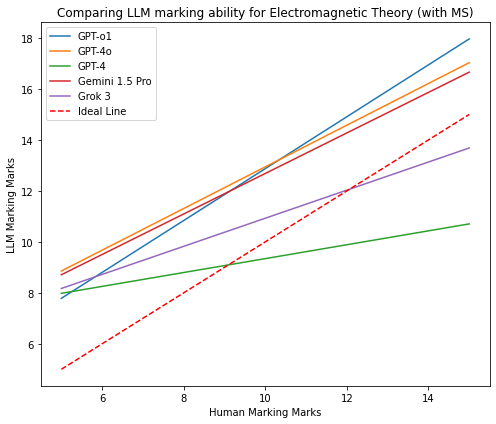

In [69]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_em_With'] * x_values + row['intercept_raw_em_With']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Electromagnetic Theory (with MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

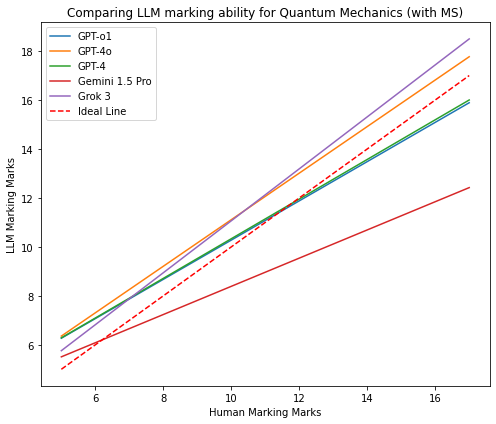

In [70]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_qm_With'] * x_values + row['intercept_raw_qm_With']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability for Quantum Mechanics (with MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

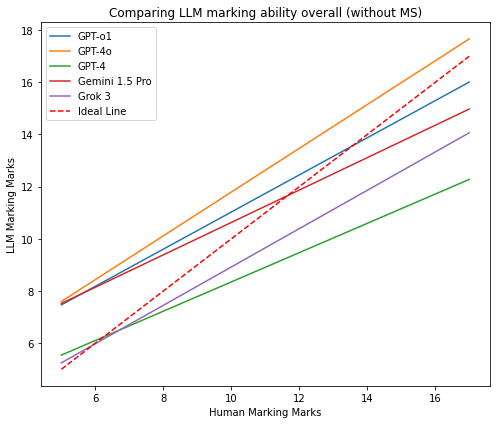

In [71]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_Without'] * x_values + row['intercept_raw_Without']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability overall (without MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

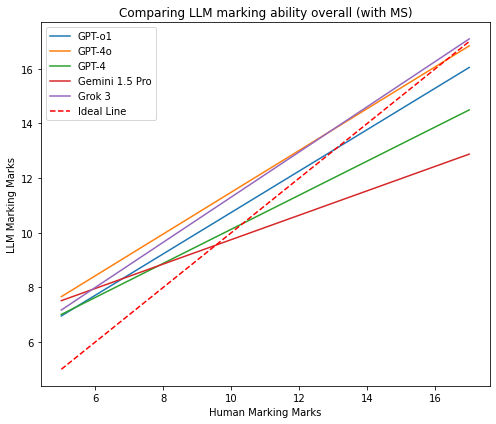

In [72]:
# Define the x values
x_values = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

# Plot the lines for each model
plt.figure(figsize=(7, 6))

for index, row in LLMdf.iterrows():
    y_values = row['slope_raw_With'] * x_values + row['intercept_raw_With']
    plt.plot(x_values, y_values, label=row['Model'])
# Add a dashed line of y=x for the ideal line
plt.plot(x_values, x_values, 'r--', label='Ideal Line')
# Add labels, title, and legend
plt.xlabel('Human Marking Marks')
plt.ylabel('LLM Marking Marks')
plt.title('Comparing LLM marking ability overall (with MS)')
plt.legend()
#plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

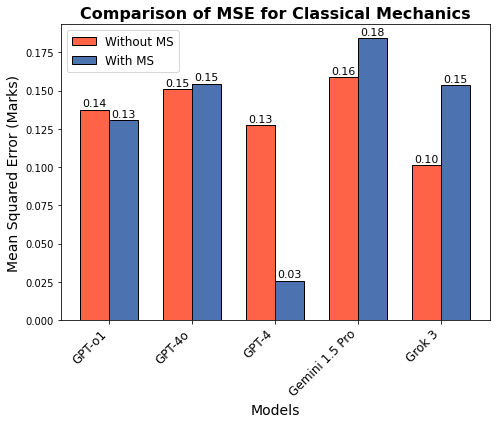

In [73]:
# Define the labels and values
mse_cm_without = LLMdf['mse_cm_Without']
mse_cm_with = LLMdf['mse_cm_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, mse_cm_without, width, label='Without MS', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, mse_cm_with, width, label='With MS', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Mean Squared Error (Marks)', fontsize=14)
ax.set_title('Comparison of MSE for Classical Mechanics', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with MSE values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()


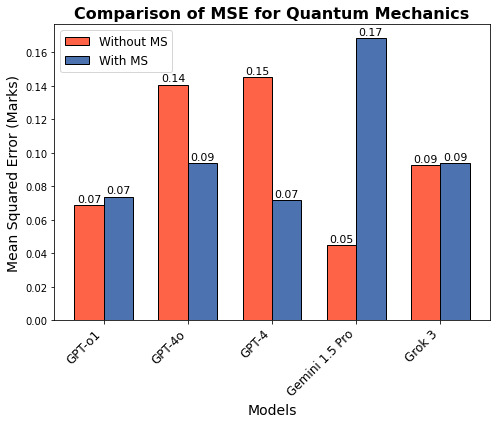

In [74]:
# Define the labels and values
mse_cm_without = LLMdf['mse_qm_Without']
mse_cm_with = LLMdf['mse_qm_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, mse_cm_without, width, label='Without MS', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, mse_cm_with, width, label='With MS', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Mean Squared Error (Marks)', fontsize=14)
ax.set_title('Comparison of MSE for Quantum Mechanics', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with MSE values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()


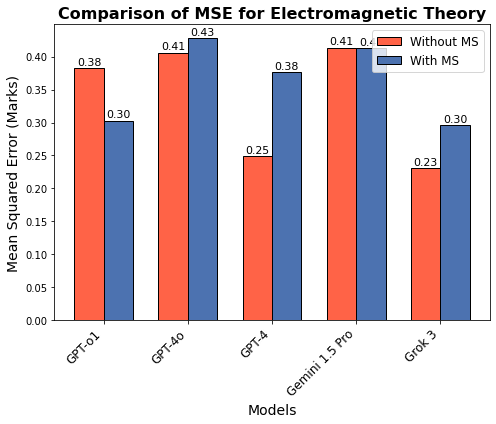

In [75]:
# Define the labels and values
mse_cm_without = LLMdf['mse_em_Without']
mse_cm_with = LLMdf['mse_em_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, mse_cm_without, width, label='Without MS', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, mse_cm_with, width, label='With MS', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Mean Squared Error (Marks)', fontsize=14)
ax.set_title('Comparison of MSE for Electromagnetic Theory', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with MSE values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()


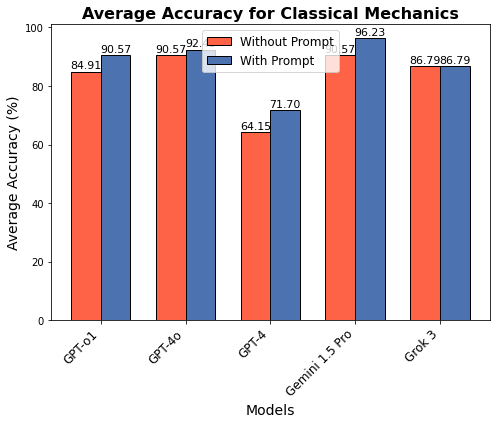

In [76]:
# Define the labels and values
avg_acc_cm_without = LLMdf['avg_acc_cm_Without']
avg_acc_cm_with = LLMdf['avg_acc_cm_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, avg_acc_cm_without, width, label='Without Prompt', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, avg_acc_cm_with, width, label='With Prompt', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Average Accuracy (%)', fontsize=14)
ax.set_title('Average Accuracy for Classical Mechanics', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with accuracy values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()

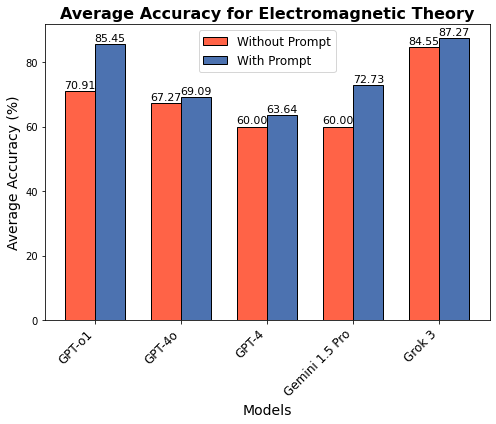

In [77]:
# Define the labels and values
avg_acc_cm_without = LLMdf['avg_acc_em_Without']
avg_acc_cm_with = LLMdf['avg_acc_em_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, avg_acc_cm_without, width, label='Without Prompt', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, avg_acc_cm_with, width, label='With Prompt', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Average Accuracy (%)', fontsize=14)
ax.set_title('Average Accuracy for Electromagnetic Theory', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with accuracy values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()

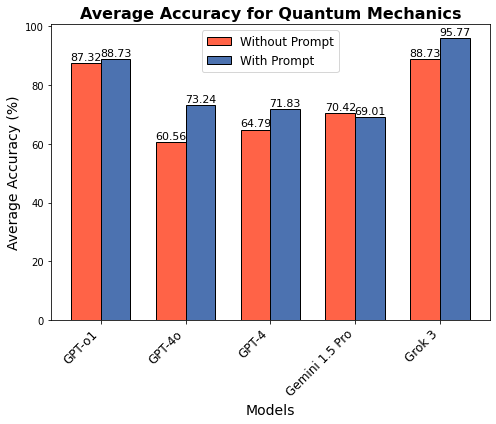

In [78]:
# Define the labels and values
avg_acc_cm_without = LLMdf['avg_acc_qm_Without']
avg_acc_cm_with = LLMdf['avg_acc_qm_With']
labels = LLMdf['Model']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
bars1 = ax.bar(x - width/2, avg_acc_cm_without, width, label='Without Prompt', color='#FF6347', edgecolor='black')
bars2 = ax.bar(x + width/2, avg_acc_cm_with, width, label='With Prompt', color='#4C72B0', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Average Accuracy (%)', fontsize=14)
ax.set_title('Average Accuracy for Quantum Mechanics', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.legend(fontsize=12)

# Annotate the bars with accuracy values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [79]:
# List of relevant sheets to process
sheets = ['CM', 'EM', 'QM']

# Function to process each sheet and generate scatter plots
def process_sheet_noms(sheet_name):
    # Load the sheet
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()

    # Extract available marks
    available_marks = df['Available Marks'].values

    # Extract raw marks
    solution_marks = df[['Solution 1', 'Solution 2', 'Solution 3']].values.flatten()
    without_ms_marks = df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].values.flatten()
    LLM_no_prompt = df[['Response without Prompt']].values.flatten()
    LLM_with_prompt = df[['Response with Prompt']].values.flatten()
    print(solution_marks)
    print(without_ms_marks)
    # Convert marks to percentages
    solution_perc = (df[['Solution 1', 'Solution 2', 'Solution 3']].div(available_marks, axis=0) * 100).values.flatten()
    without_ms_perc = (df[['without MS - Sol 1', 'without MS - Sol 2', 'without MS - Sol 3']].div(available_marks, axis=0) * 100).values.flatten()

    # Compute line of best fit for raw marks
    slope_raw, intercept_raw = np.polyfit(solution_marks, without_ms_marks, 1)
    fit_line_raw = slope_raw * np.array(solution_marks) + intercept_raw
    
    # Compute line of best fit for percentage marks
    slope_perc, intercept_perc = np.polyfit(solution_perc, without_ms_perc, 1)
    fit_line_perc = slope_perc * np.array(solution_perc) + intercept_perc

    # Print gradient and y-intercept
    print(f"Sheet: {sheet_name}")
    print(f"Raw Marks - Gradient: {slope_raw:}, Y-Intercept: {intercept_raw}")
    print(f"Percentage Marks - Gradient: {slope_perc}, Y-Intercept: {intercept_perc}\n")

    # Plot for raw marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_marks, without_ms_marks, alpha=0.7, label="Questions")
    plt.plot([min(solution_marks), max(solution_marks)], [min(solution_marks), max(solution_marks)], 'r--', label="Ideal Best Fit Line (y=x)")
    plt.plot(solution_marks, fit_line_raw, 'g-', label="Best Fit Line")
    plt.xlabel("Human Marking Marks")
    plt.ylabel("Blind Marking Marks")
    plt.title(f"Raw Marks: ChatGPT o1 Without MS ({sheet_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for percentage marks
    plt.figure(figsize=(8, 6))
    plt.scatter(solution_perc, without_ms_perc, alpha=0.7, label="Data Points")
    plt.plot([min(solution_perc), max(solution_perc)], [min(solution_perc), max(solution_perc)], 'r--', label="y=x Line")
    plt.plot(solution_perc, fit_line_perc, 'g-', label="Best Fit Line")
    plt.xlabel("Percentage from Solution (%)")
    plt.ylabel("Percentage without MS (%)")
    plt.title(f"Percentage of Marks: ChatGPT o1 Without MS ({sheet_name})")
    plt.legend()
    #plt.grid(True)
    plt.show()

    return df, slope_raw, intercept_raw, slope_perc, intercept_perc


df_cm, noms_cm_grad, noms_cm_int, noms_cm_percgrad, noms_cm_percint = process_sheet_noms(sheet_name="CM")
df_cm.head()

ValueError: Worksheet named 'CM' not found